### 線形回帰・Ridge回帰・Lasso回帰

（社内技術発表用）

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import AlphaSelection

In [55]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('X:', X.shape)
print('y:', y.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X: (506, 104)
y: (506,)
X_train: (379, 104)
y_train: (379,)
X_test: (127, 104)
y_test: (127,)


まず、線形回帰でモデルの作成を行う。

In [56]:
lr = LinearRegression().fit(X_train, y_train)

# 決定係数（回帰モデルの予測の正確さを測る指標）
print('Train set score: {}'.format(lr.score(X_train, y_train)))
print('Test set score: {}'.format(lr.score(X_test, y_test)))

Train set score: 0.9520519609032729
Test set score: 0.6074721959665842


訓練データに対して予測のスコアが高く、テストデータに対して低いということは<br>
作成したモデルが下図のように、過学習を起こしているということである。

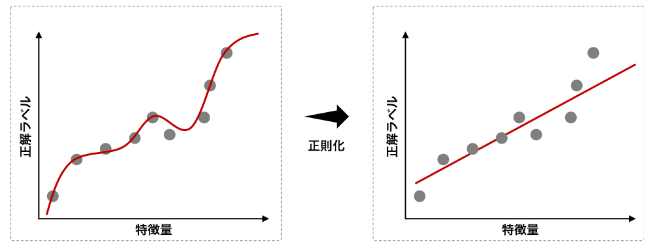

これを防ぐために、Ridge回帰で正則化（パラメータ：alpha）を行い、過学習を防ぐ。<br>
alphaが大きくなるほど、係数（特徴量）は0に近づいていく。<br>
つまり、訓練データへの予測スコアは落ちるが、テストデータは上がる。（汎化性能も向上する）

In [57]:
ridge = Ridge(alpha=1).fit(X_train, y_train)

print('Training set score: {}'.format(ridge.score(X_train, y_train)))
print('Test set score: {}'.format(ridge.score(X_test, y_test)))

Training set score: 0.885796658517094
Test set score: 0.7527683481744752


In [58]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [59]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('Training set score: {}'.format(ridge.score(X_train, y_train)))
print('Test set score: {}'.format(ridge.score(X_test, y_test)))

Training set score: 0.885796658517094
Test set score: 0.7527683481744752


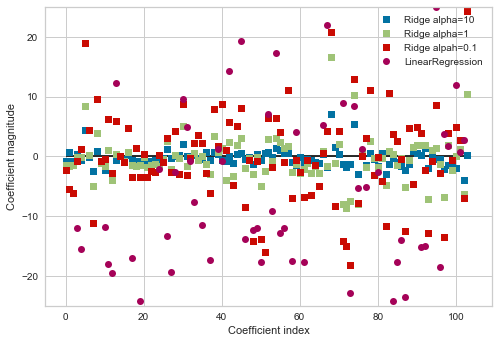

In [60]:
plt.plot(ridge10.coef_, 's', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 's', label='Ridge alpah=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)

plt.legend()

横軸：104個の特徴量<br>
縦軸：モデルにおける各係数の大きさ<br>

図より、alpha=1のときが最も係数のばらつきが小さい。<br>
よって汎化性能も高いことが分かる。（上で求めた決定係数も大きい）

また、先ほどはいくつかのalphaを代入して決定係数の比較をしたが<br>
最適なalphaについて、事前に調べる方法もある。

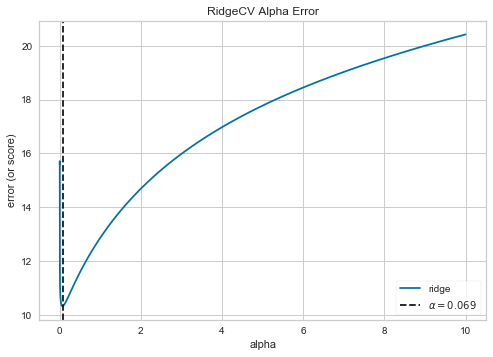

In [62]:
# alphaの探索区間を設定
alphas = np.logspace(-10, 1, 500)

# 訓練データを交差検証、最適な値を求める
ridgeCV = RidgeCV(alphas = alphas)

# alphaのプロット
visualizer = AlphaSelection(ridgeCV)
visualizer.fit(X_train, y_train)

visualizer.show()
plt.show()

In [63]:
ridge0069 = Ridge(alpha=0.069).fit(X_train, y_train)

print('Training set score: {}'.format(ridge.score(X_train, y_train)))
print('Test set score: {}'.format(ridge.score(X_test, y_test)))

Training set score: 0.885796658517094
Test set score: 0.7527683481744752


この場合でも、alpha=0.1, 1と同程度の決定係数のスコアが得られることが分かる。

線形回帰とRidge回帰（alpha=1）の比較として、学習曲線をプロットする。

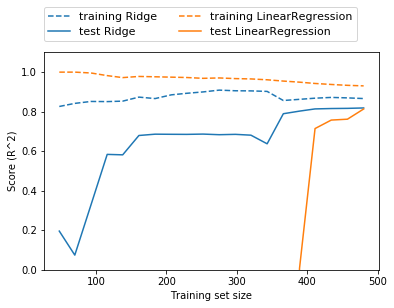

In [35]:
mglearn.plots.plot_ridge_n_samples()

横軸：データサイズ<br>
縦軸：決定係数

線形回帰では過学習を起こしやすいため、訓練データのスコアは高いが<br>
テストデータにおいては、汎化性能がゼロに等しい。

ただしデータサイズ（総量）が十分にあれば<br>
Ridge回帰と同程度の汎化性能を持つことができる。

次にLasso回帰で、モデルの作成を行う。

Ridge回帰と同様に、係数が0に近づくように制約をかけるが<br>
かけ方が少し違い、Lasso回帰はいくつかの係数が完全にゼロとなる。

In [36]:
lasso = Lasso().fit(X_train, y_train)

print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [37]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print('Traing set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso001.coef_ != 0)))

Traing set score: 0.90
Test set score: 0.77
Number of features used: 33


In [38]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print('Training set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Lasso回帰の長所は、特徴量が少ない分、シンプルで分かりやすいモデルを構築できることである。

重要な特徴量の数が分からないようであれば、最初にRidge回帰を行い<br>
不要なものがあると分かれば、Lasso回帰で試してみるのが良い。

最後に、Ridge回帰とLasso回帰について<br>
各係数と値のばらつきについて比較をしておく。

Text(0, 0.5, 'Coefficient magnitude')

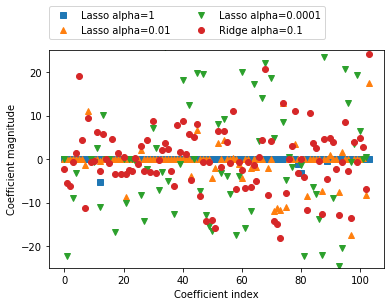

In [39]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

やはり係数のばらつきもある程度は必要であり<br>
Lasso（alpha=0.0001）はRidge（alpha=1）と同程度散らばっているので<br>
決定係数のスコアも近しいことが分かる。

結論：基本はRidge回帰でモデリングをし、不要な特徴量があればLasso回帰を行うのが良い。<br>
　　　ElasticNet（RidgeとLassoの両方のパラメータを持つ）でも良いが、調整に手間がかかる。

### 参考文献

Pythonではじめる機械学習：https://www.oreilly.co.jp/books/9784873117980/